<a href="https://colab.research.google.com/github/bvc-github/UPGRAD_CAPSTONE_Credit_card_prediction/blob/main/Creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from google.colab import files
import io


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import files
import pandas as pd
import io

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Read the uploaded file into a pandas DataFrame
# Get the filename from the uploaded files
filename = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display the first few rows of the DataFrame
print(df.head())


Saving creditcard.csv to creditcard.csv
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206

Class
0    284315
1       492
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float

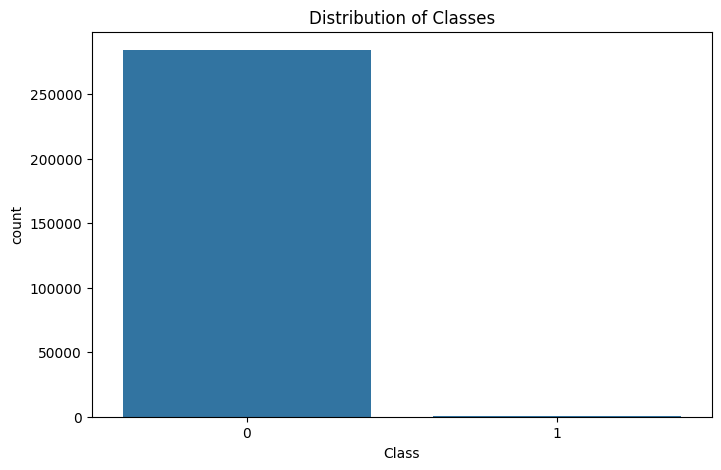

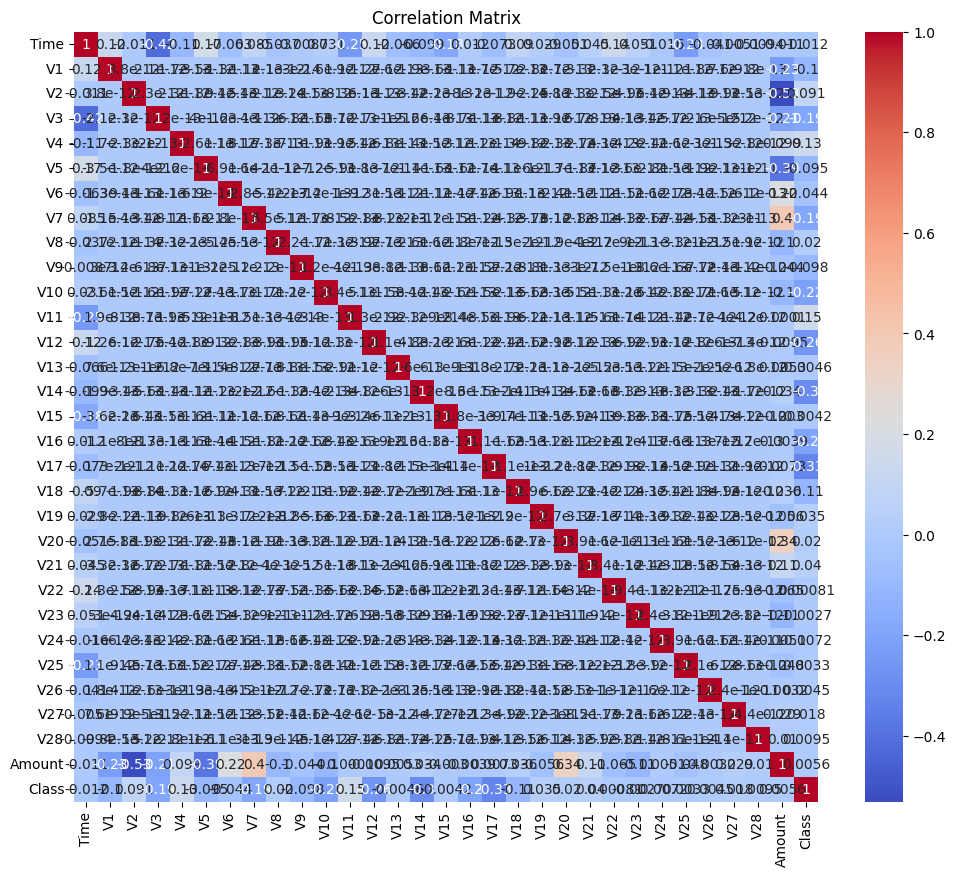

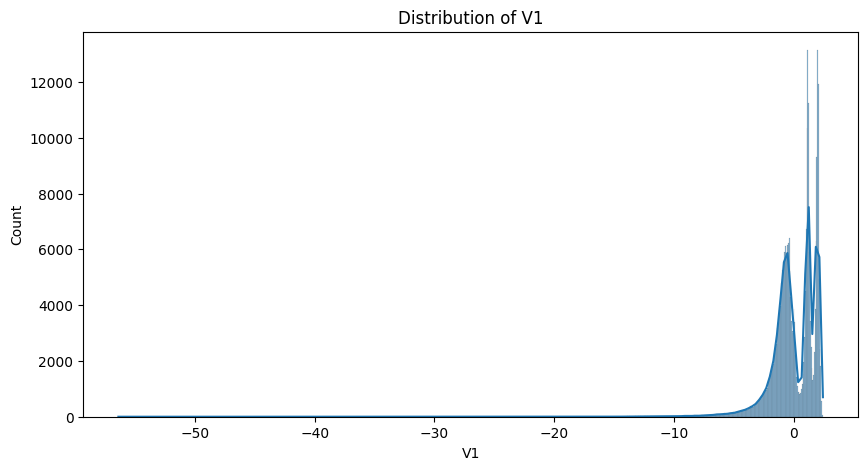

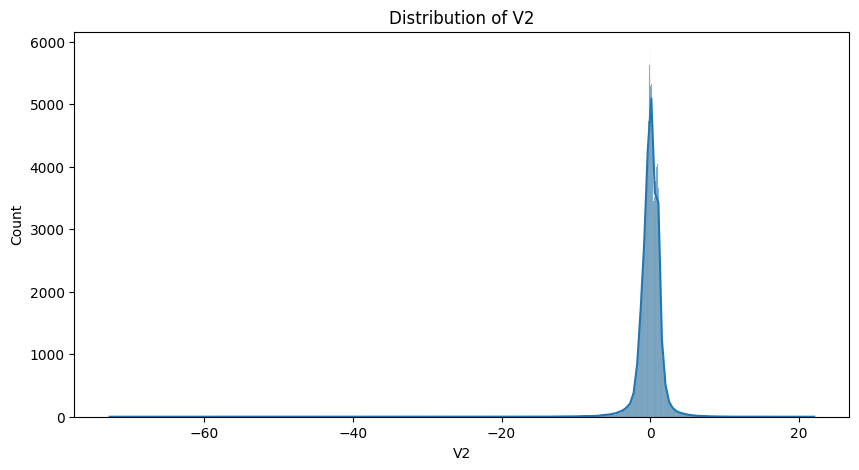

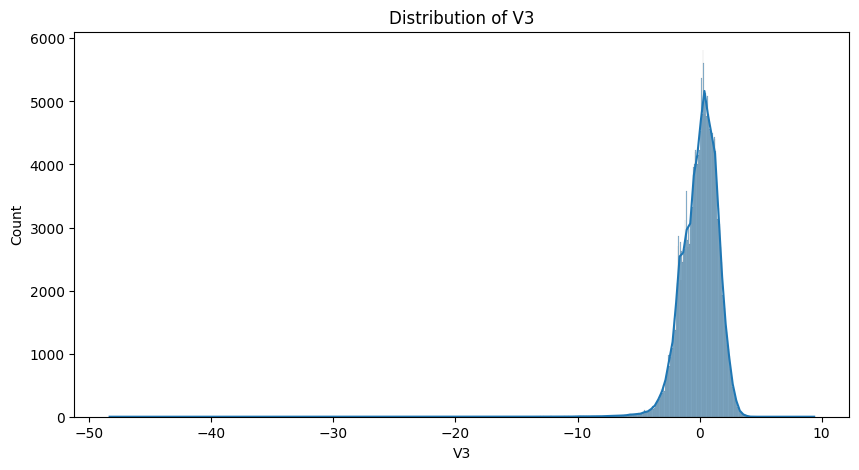

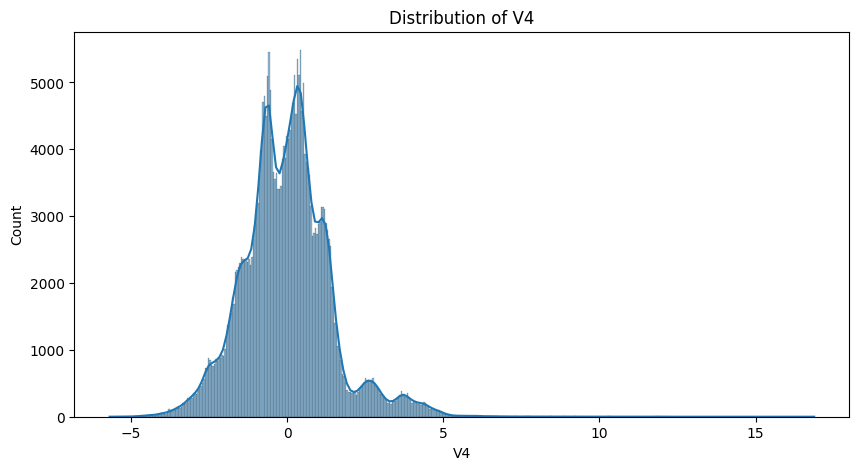

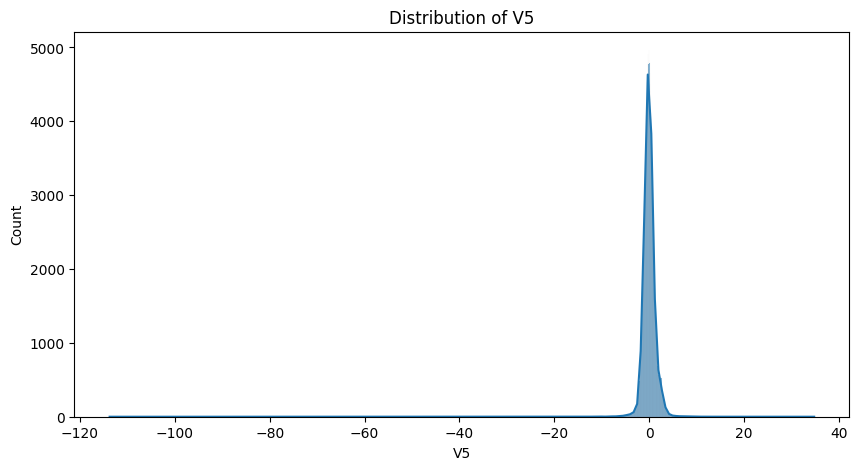

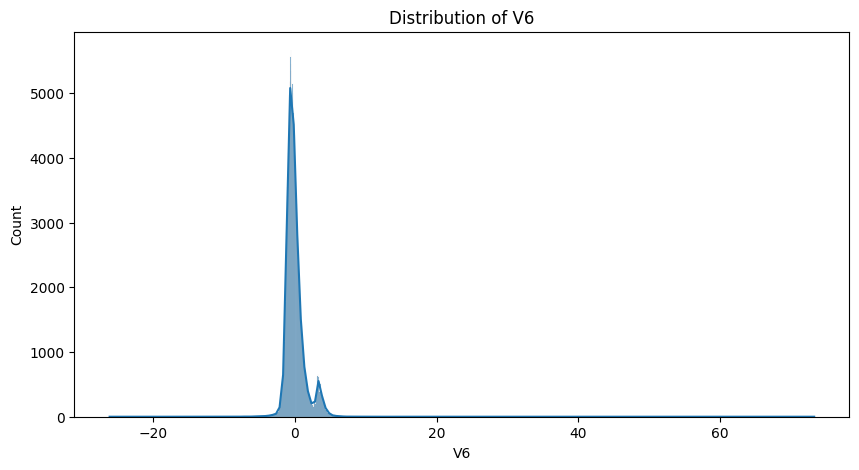

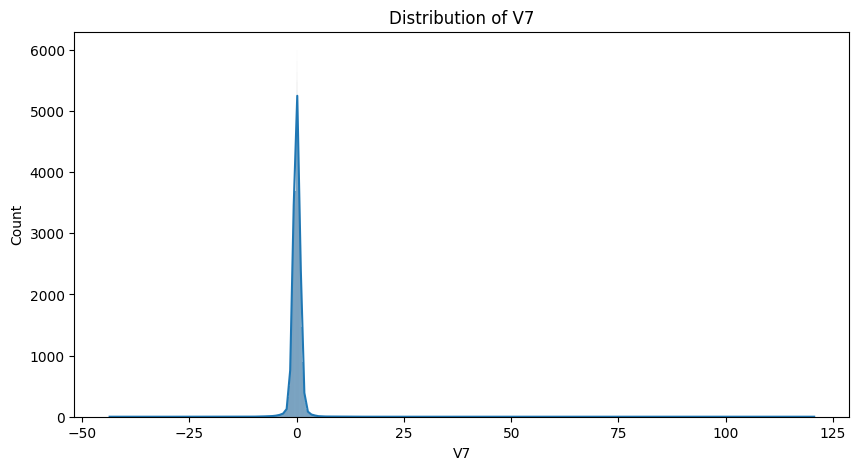

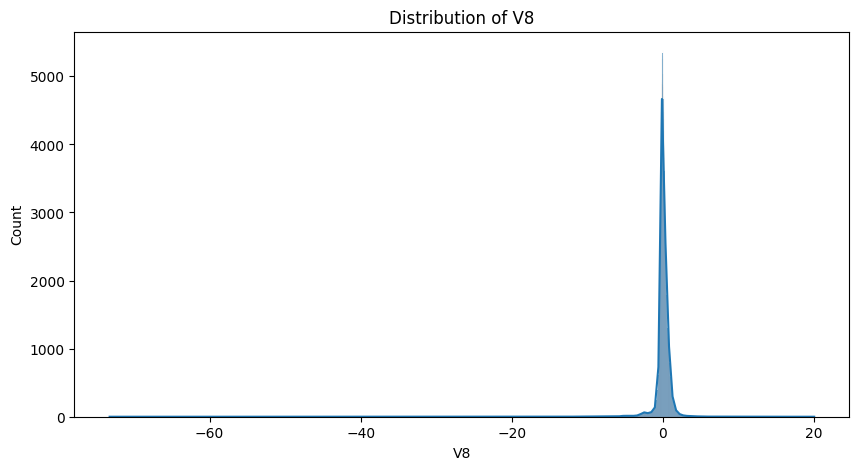

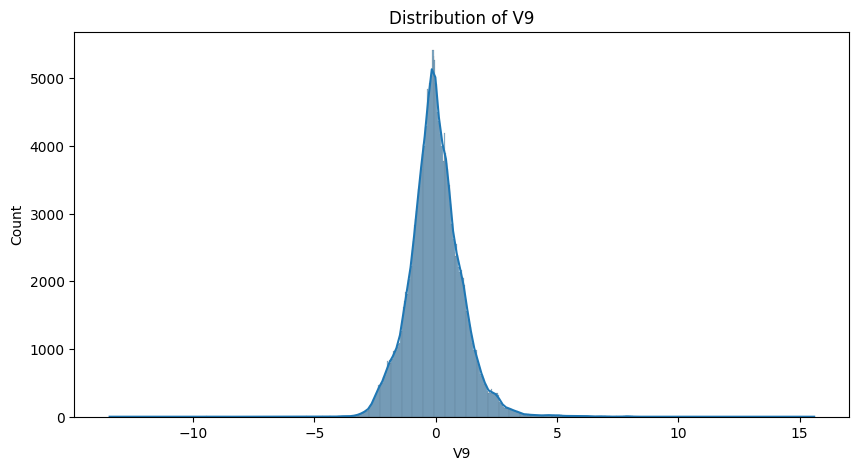

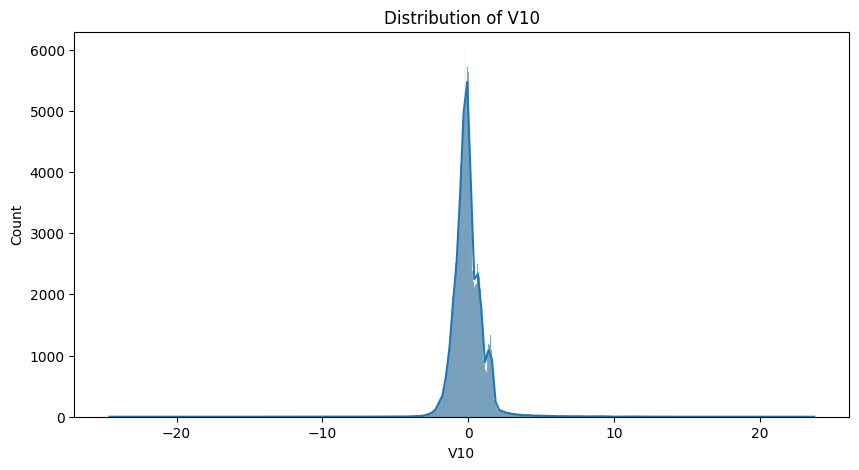

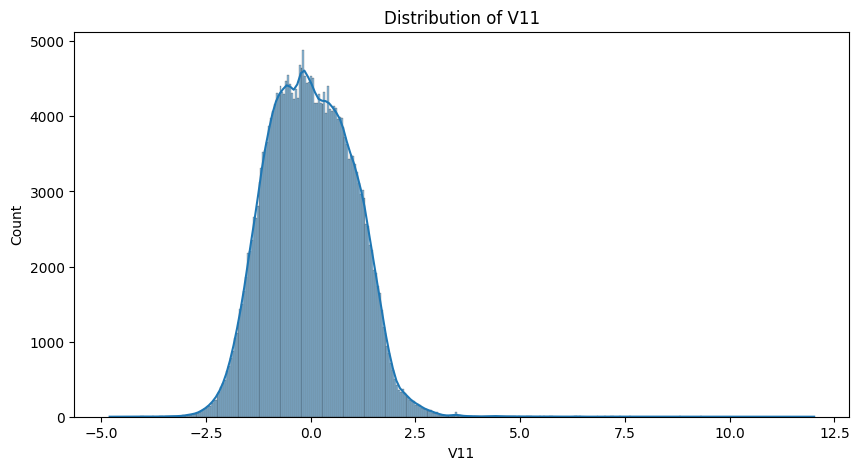

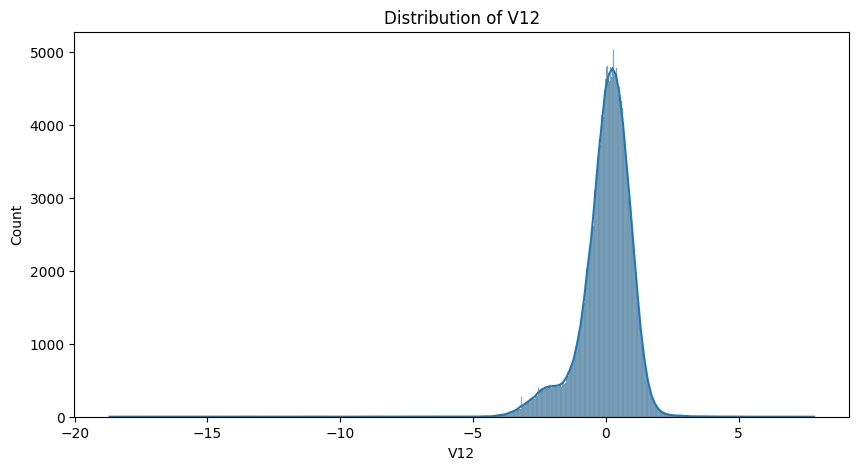

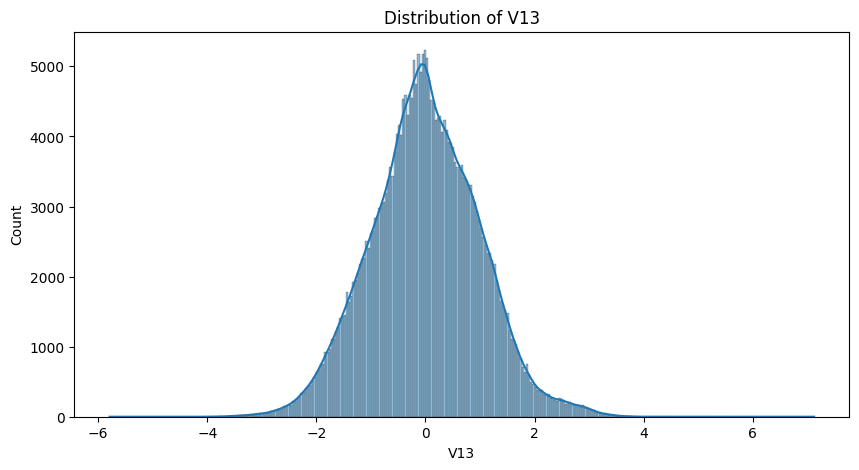

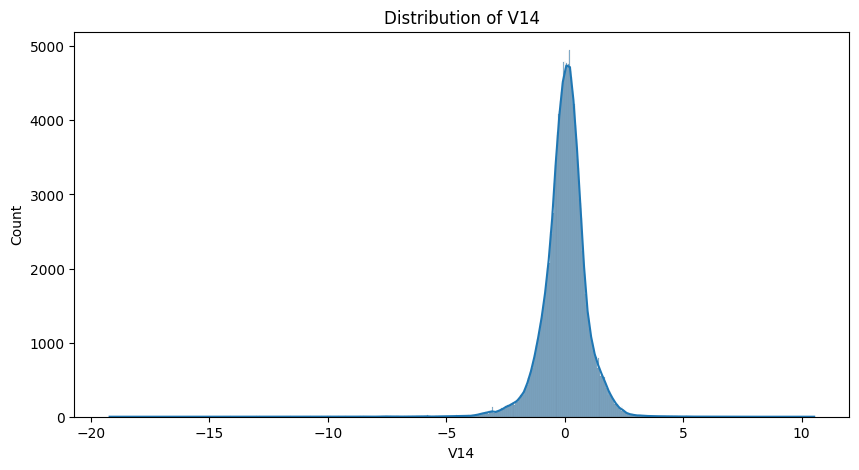

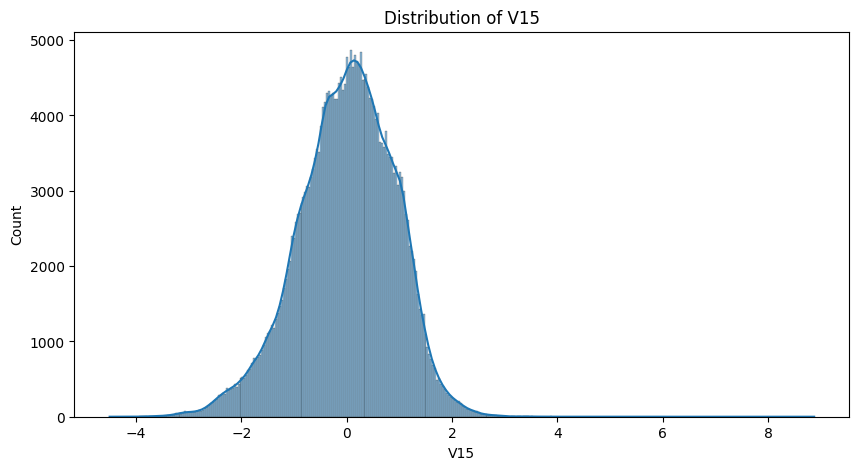

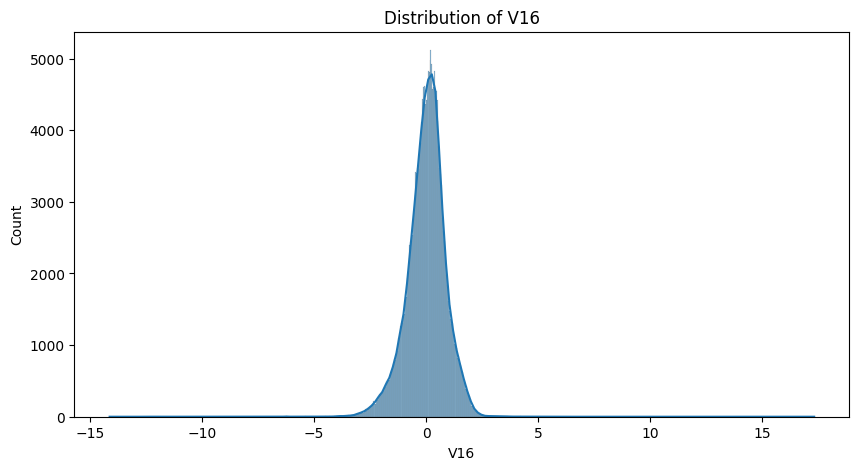

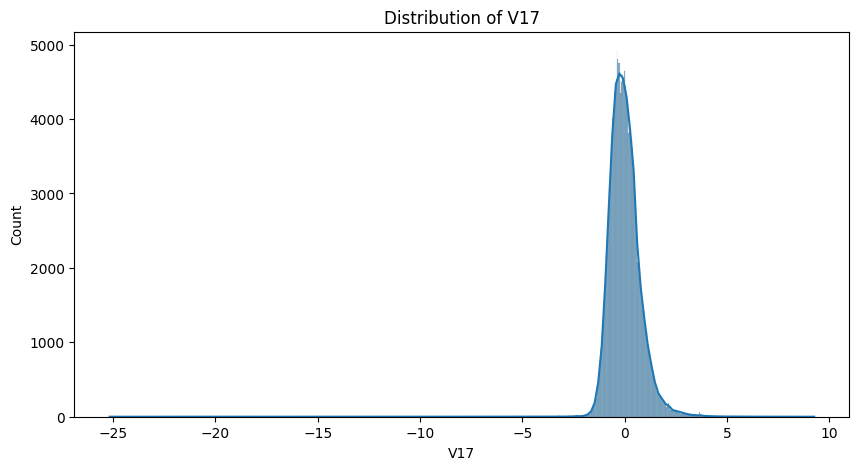

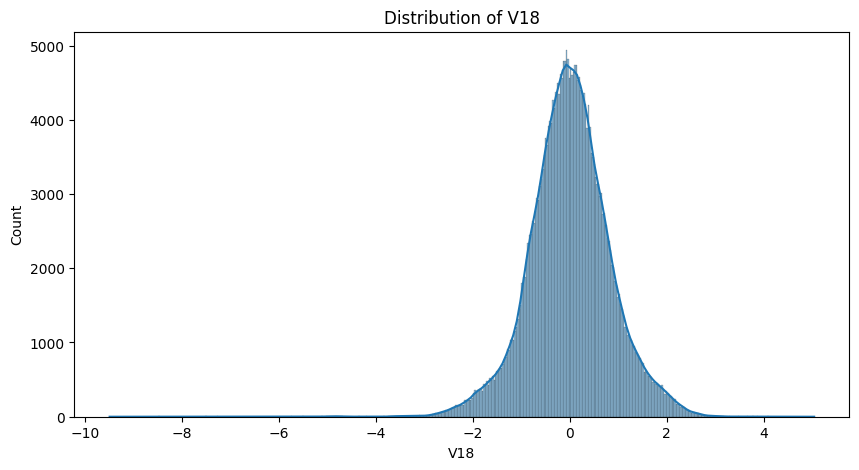

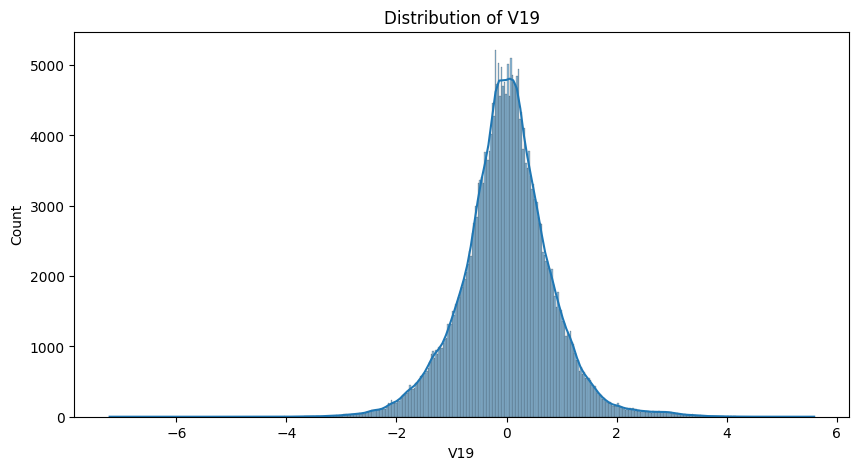

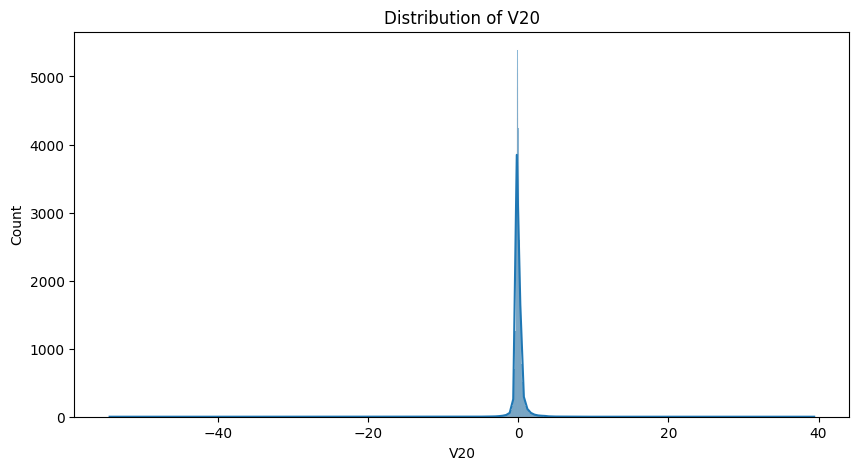

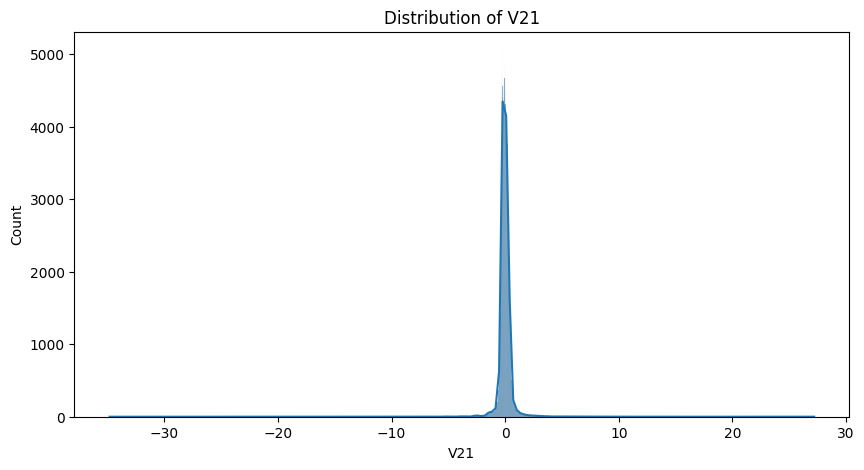

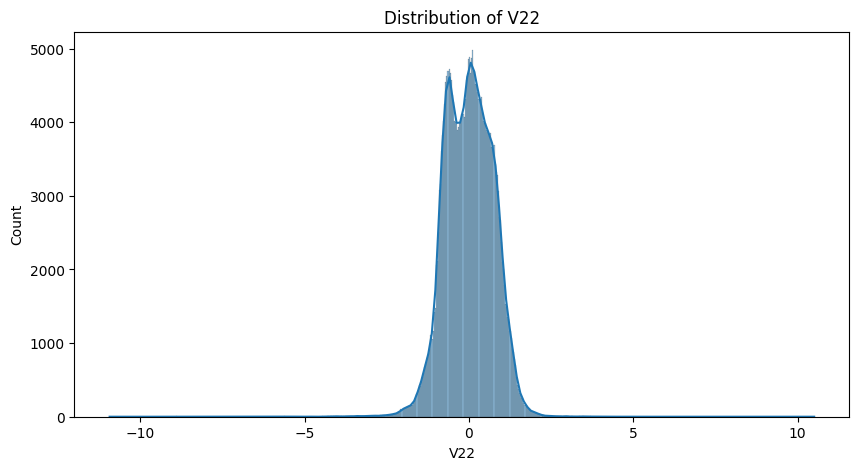

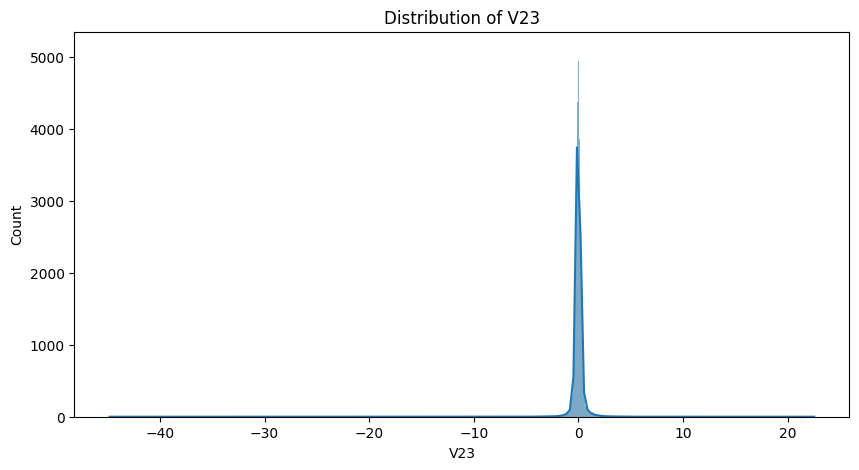

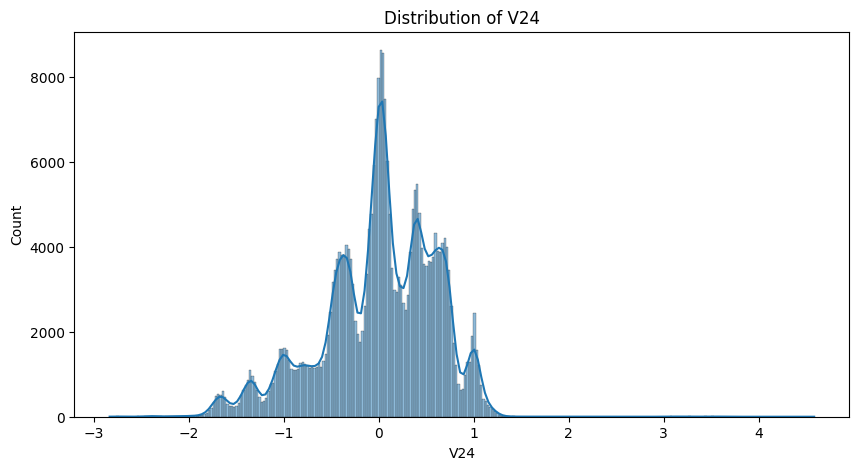

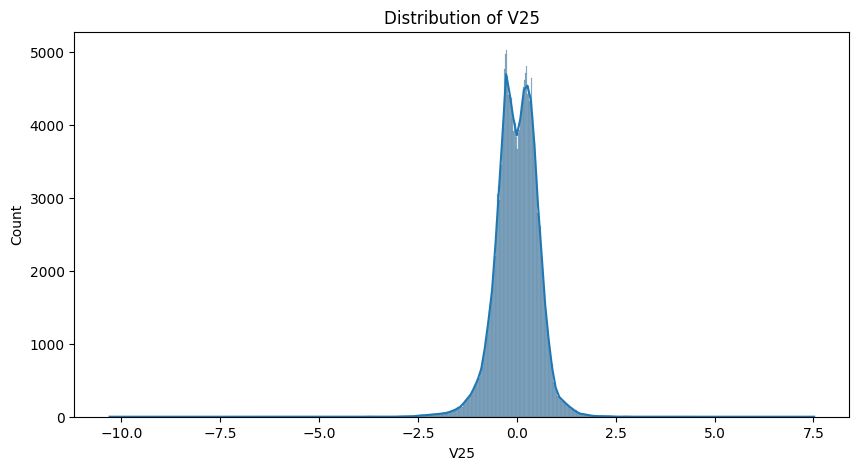

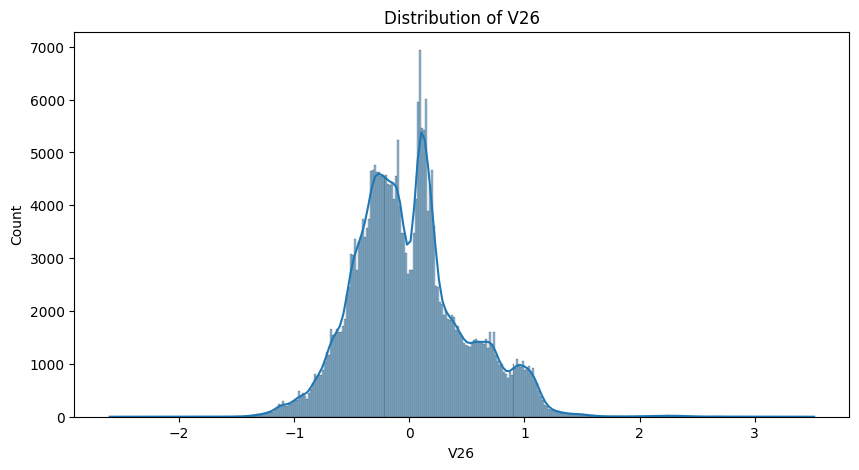

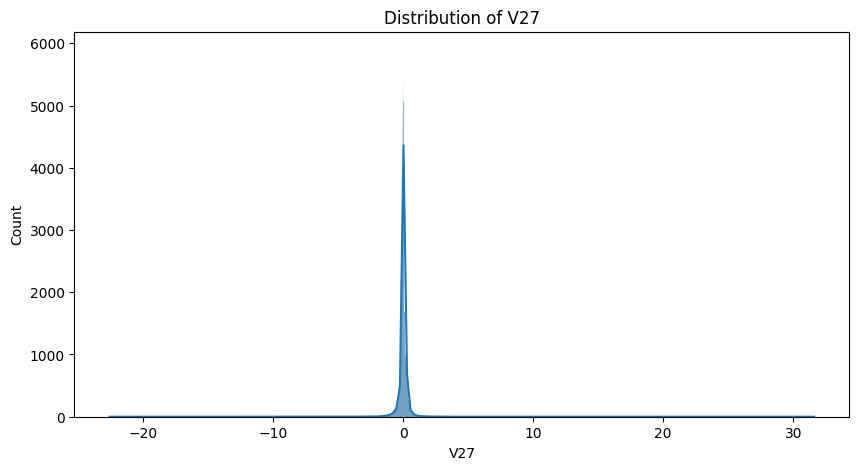

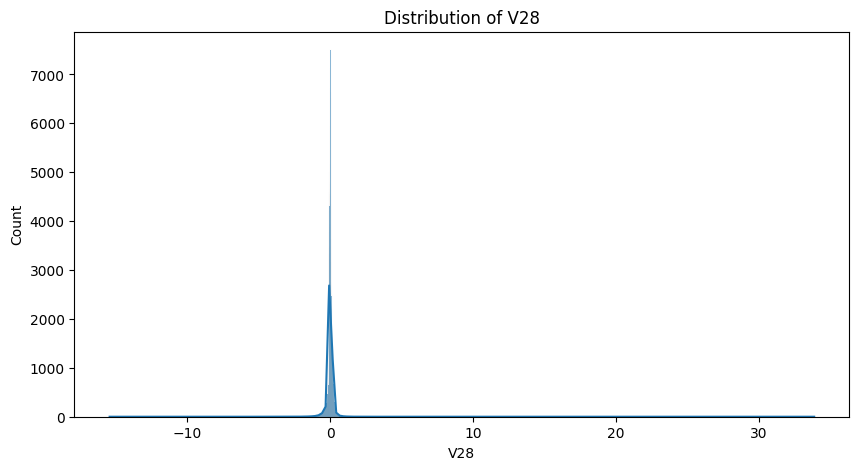

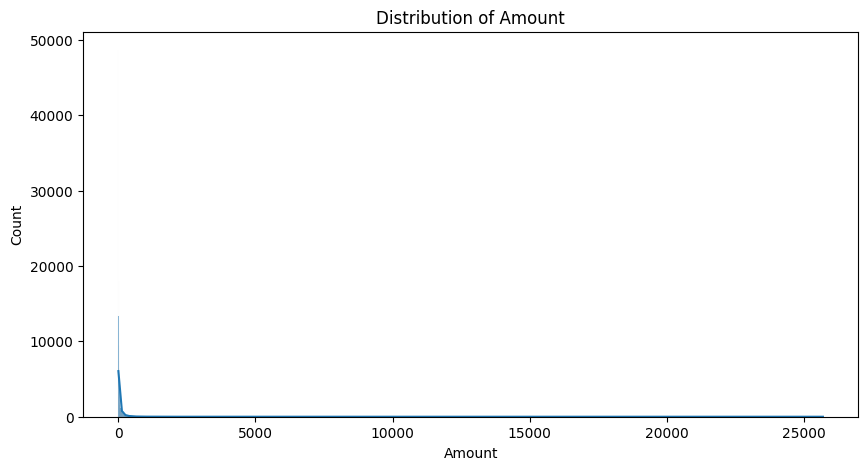

In [ ]:
data = df
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_data(data):
    # Display class distribution
    print(data['Class'].value_counts())

    # Display basic information
    print(data.info())

    # Display descriptive statistics
    print(data.describe())

    # Visualize the distribution of classes
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Class', data=data)
    plt.title('Distribution of Classes')
    plt.show()

    # Visualize correlations
    corr_matrix = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Visualize some feature distributions
    features = data.columns[1:-1]  # Exclude Time and Class
    for feature in features:
        plt.figure(figsize=(10, 5))
        sns.histplot(data[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()

# Now you can call the function with your DataFrame
analyze_data(data)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

def preprocess_data(data):
    # Check for missing values
    print("Missing values in each column:")
    print(data.isnull().sum())

    # Handle missing values by filling with median
    data.fillna(data.median(), inplace=True)

    # Outlier detection using z-scores
    features = data.columns[1:-1]  # Exclude Time and Class
    z_scores = np.abs(stats.zscore(data[features]))
    data = data[(z_scores < 3).all(axis=1)]

    # Standardize the data
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[features])

    # Update the data with scaled features
    data_scaled = pd.DataFrame(scaled_features, columns=features)
    data_scaled['Amount'] = data['Amount'].values
    data_scaled['Class'] = data['Class'].values

    return data_scaled

# Now you can call the function with your DataFrame
data_scaled = preprocess_data(data)


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

X = data_scaled.drop('Class', axis=1)
y = data_scaled['Class']

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced['Class'] = y_resampled


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from scipy.sparse import csr_matrix, hstack

# Assuming data_balanced is your DataFrame and 'Class' is the target column

# Initialize PolynomialFeatures without sparse parameter
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

# Apply polynomial features transformation
X_poly = poly.fit_transform(data_balanced.drop('Class', axis=1))

# Convert the dense matrix to a sparse matrix
X_poly_sparse = csr_matrix(X_poly)

# Convert the sparse matrix to a DataFrame with sparse capabilities
data_poly_sparse = pd.DataFrame.sparse.from_spmatrix(X_poly_sparse, columns=poly.get_feature_names_out())

# Add the target variable back to the DataFrame
data_poly_sparse['Class'] = data_balanced['Class']

# Check the resulting DataFrame
print(data_poly_sparse.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493886 entries, 0 to 493885
Columns: 436 entries, V1 to Class
dtypes: Sparse[float64, 0](435), int64(1)
memory usage: 2.4 GB
None


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data_poly_sparse' is your DataFrame and 'Class' is the target column

# Sample 10% of the dataset
data_sample = data_poly_sparse.sample(frac=0.1, random_state=42)

# Split the sampled data into features and target
X = data_sample.drop('Class', axis=1)
y = data_sample['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and fit the Random Forest model with memory efficiency in mind
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest model trained.")

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest model trained.
Confusion Matrix:
[[6991  337]
 [ 144 7345]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      7328
           1       0.96      0.98      0.97      7489

    accuracy                           0.97     14817
   macro avg       0.97      0.97      0.97     14817
weighted avg       0.97      0.97      0.97     14817



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Sample 10% of the dataset
data_sample = data_poly_sparse.sample(frac=0.1, random_state=42)

# Split the sampled data into features and target
X = data_sample.drop('Class', axis=1)
y = data_sample['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data for Logistic Regression and SVC
scaler = StandardScaler(with_mean=False)  # Use with_mean=False for sparse data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of models to train
models = {
    'Random Forest': RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Support Vector Classifier': SVC(random_state=42)
}

# Train, predict, and assess each model
for name, model in models.items():
    if name == 'Support Vector Classifier':
        # For SVC, use the scaled data
        model.fit(X_train_scaled, y_train)  # Train the model
        y_pred = model.predict(X_test_scaled)  # Make predictions
    else:
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Make predictions

    # Assess the model
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 40)  # Separator for readability


Random Forest Confusion Matrix:
[[6991  337]
 [ 144 7345]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      7328
           1       0.96      0.98      0.97      7489

    accuracy                           0.97     14817
   macro avg       0.97      0.97      0.97     14817
weighted avg       0.97      0.97      0.97     14817

----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Confusion Matrix:
[[7016  312]
 [   7 7482]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      7328
           1       0.96      1.00      0.98      7489

    accuracy                           0.98     14817
   macro avg       0.98      0.98      0.98     14817
weighted avg       0.98      0.98      0.98     14817

----------------------------------------
Support Vector Classifier Confusion Matrix:
[[7288   40]
 [   0 7489]]
Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7328
           1       0.99      1.00      1.00      7489

    accuracy                           1.00     14817
   macro avg       1.00      1.00      1.00     14817
weighted avg       1.00      1.00      1.00     14817

----------------------------------------


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter distributions for Randomized Search
param_distributions = {
    'Random Forest': {
        'n_estimators': np.arange(10, 51, 10),  # Test from 10 to 50
        'max_depth': [5, 10, None],
        'max_features': ['sqrt']
    },
    'Logistic Regression': {
        'C': np.logspace(-2, 1, 5),  # Test values from 0.01 to 10
        'solver': ['liblinear']
    },
    'Support Vector Classifier': {
        'C': np.logspace(-2, 1, 5),  # Test values from 0.01 to 10
        'kernel': ['linear']
    }
}

# Use Randomized Search for tuning
best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    search = RandomizedSearchCV(model, param_distributions[name], n_iter=5, cv=2, random_state=42)  # Reduced n_iter and cv
    if name == 'Support Vector Classifier':
        search.fit(X_train_scaled, y_train)
    else:
        search.fit(X_train, y_train)

    best_models[name] = search.best_estimator_
    print(f"Best Parameters for {name}: {search.best_params_}")

# Evaluate best models
for name, model in best_models.items():
    if name == 'Support Vector Classifier':
        y_pred_best = model.predict(X_test_scaled)
    else:
        y_pred_best = model.predict(X_test)

    print(f"Best {name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_best))
    print(f"Best {name} Classification Report:")
    print(classification_report(y_test, y_pred_best))
    print("-" * 40)  # Separator for readability


Tuning Random Forest...
Best Parameters for Random Forest: {'n_estimators': 40, 'max_features': 'sqrt', 'max_depth': None}
Tuning Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best Parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.31622776601683794}
Tuning Support Vector Classifier...
Best Parameters for Support Vector Classifier: {'kernel': 'linear', 'C': 1.7782794100389228}
Best Random Forest Confusion Matrix:
[[7322    6]
 [   0 7489]]
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7328
           1       1.00      1.00      1.00      7489

    accuracy                           1.00     14817
   macro avg       1.00      1.00      1.00     14817
weighted avg       1.00      1.00      1.00     14817

----------------------------------------
Best Logistic Regression Confusion Matrix:
[[6865  463]
 [  77 7412]]
Best Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7328
           1       0.94      0.99      0.96      7489

    accuracy            

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
import joblib  # Import joblib for saving the model

# Assuming 'models' and 'param_distributions' are already defined
best_models = {}
accuracy_scores = {}

for name, model in models.items():
    print(f"Tuning {name}...")
    search = RandomizedSearchCV(model, param_distributions[name], n_iter=5, cv=2, random_state=42)
    if name == 'Support Vector Classifier':
        search.fit(X_train_scaled, y_train)
    else:
        search.fit(X_train, y_train)

    best_models[name] = search.best_estimator_
    y_pred_best = best_models[name].predict(X_test_scaled if name == 'Support Vector Classifier' else X_test)
    accuracy = accuracy_score(y_test, y_pred_best)
    accuracy_scores[name] = accuracy

    print(f"Best Parameters for {name}: {search.best_params_}")
    print(f"Accuracy for {name}: {accuracy:.4f}")

# Sort models based on accuracy
sorted_models = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)

# Print sorted models with their accuracies
print("\nModels sorted by accuracy:")
for name, accuracy in sorted_models:
    print(f"{name}: {accuracy:.4f}")

# Get the best model
best_model_name, best_accuracy = sorted_models[0]
best_model = best_models[best_model_name]

# Save the best model
model_filename = f"{best_model_name.replace(' ', '_')}_best_model.pkl"
joblib.dump(best_model, model_filename)

# Optional: Download the best model
from google.colab import files
files.download(model_filename)

# Evaluate best model
y_pred_best = best_model.predict(X_test_scaled if best_model_name == 'Support Vector Classifier' else X_test)
print(f"Best {best_model_name} Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print(f"Best {best_model_name} Classification Report:")
print(classification_report(y_test, y_pred_best))
print("-" * 40)  # Separator for readability


Tuning Random Forest...
Best Parameters for Random Forest: {'n_estimators': 40, 'max_features': 'sqrt', 'max_depth': None}
Accuracy for Random Forest: 0.9996
Tuning Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best Parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.31622776601683794}
Accuracy for Logistic Regression: 0.9636
Tuning Support Vector Classifier...
Best Parameters for Support Vector Classifier: {'kernel': 'linear', 'C': 1.7782794100389228}
Accuracy for Support Vector Classifier: 0.9928

Models sorted by accuracy:
Random Forest: 0.9996
Support Vector Classifier: 0.9928
Logistic Regression: 0.9636


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best Random Forest Confusion Matrix:
[[7322    6]
 [   0 7489]]
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7328
           1       1.00      1.00      1.00      7489

    accuracy                           1.00     14817
   macro avg       1.00      1.00      1.00     14817
weighted avg       1.00      1.00      1.00     14817

----------------------------------------


In [ ]:
!pip install Flask
import Flask
import joblib
# Save the best model
model_name = sorted_models[0][0]
joblib.dump(best_models[model_name], 'best_model.pkl')

# Flask API for deployment
app = Flask(__name__)
model = joblib.load('best_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = np.array(data['features']).reshape(1, -1)  # Adjust shape as necessary
    prediction = model.predict(features)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

ModuleNotFoundError: No module named 'Flask'

Class
0.0    284807
Name: count, dtype: int64


Original class distribution: 
Class
0    199008
1       356
Name: count, dtype: int64
Resampled class distribution: 
Class
0    199008
1    199008
Name: count, dtype: int64


KeyboardInterrupt: 

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

Model: Logistic Regression, ROC AUC Score: 0.9899705364775276
Model: Decision Tree, ROC AUC Score: 0.9982135506162577
Model: Random Forest, ROC AUC Score: 0.9999993778971159
Model: Gradient Boosting, ROC AUC Score: 0.998321129879866
Model: XGBoost, ROC AUC Score: 0.999994441434186
[LightGBM] [Info] Number of positive: 227339, number of negative: 227565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.171777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499752 -> initscore=-0.000994
[LightGBM] [Info] Start training from score -0.000994
Model: LightGBM, ROC AUC Score: 0.9999591634223916

Models sorted from best to worst based on ROC AUC Score:
Random Forest: 0.9999993778971159
XGBoost: 0.999994441434186
LightGBM: 0.9999591634223916
Gradient Boosting: 0.9